# Data Exploration Notebook

A notebook for exploring the chicago.chicago_311_data table in Civis

## Chicago 311 Data Table Metadata

The `chicago.chicago_311_data` table contains 1000 rows and 39 columns, with a size of 42 MB. Below is a summary of its key columns and their types:

- `sr_number`: string (primary key)
- `sr_type`: string (service request type)
- `status`: string (Completed, Open, Canceled)
- `created_date`, `last_modified_date`, `closed_date`: string (timestamps)
- `street_address`, `city`, `state`, `zip_code`: location info
- `owner_department`, `created_department`: string
- `latitude`, `longitude`: float (geolocation)
- Many additional columns for request details, police, sanitation, and more.

Next, let's fetch and display some sample data from this table.

In [2]:
# Fetch the entire chicago.chicago_311_data table using Civis API
import civis
import pandas as pd

# Replace with your database name and table name
DATABASE = 'Civis Database'
TABLE_NAME = 'chicago.chicago_311_data'

# Use civis to read the table into a pandas DataFrame
query = f'SELECT * FROM {TABLE_NAME}'

# This will use your Civis credentials from environment
df = civis.io.read_civis_sql(query, database=DATABASE, return_as='pandas')
df.head()

,sr_number,sr_type,sr_short_code,created_department,owner_department,status,origin,created_date,last_modified_date,closed_date,...,precinct,sanitation_division_days,created_hour,created_day_of_week,created_month,x_coordinate,y_coordinate,latitude,longitude,location
0,SR19-01081233,Traffic Signal Out Complaint,SFB,NaN,CDOT - Department of Transportation,Completed,Phone Call,2019-02-27T13:39:03.000,2025-04-18T14:45:28.000,2025-04-18T14:45:28.000,...,36.0,Monday,13,4,2,1.172634e+06,1.865722e+06,41.786985,-87.642574,"\n, \n(41.786984819398455, -87.64257385414358)"
1,SR19-01471575,Traffic Signal Out Complaint,SFB,CDOT - Department of Transportation,CDOT - Department of Transportation,Completed,Phone Call,2019-05-11T06:50:10.000,2025-04-18T14:23:20.000,2025-04-18T14:23:19.000,...,19.0,NaN,6,7,5,1.174613e+06,1.820620e+06,41.663175,-87.636659,"\n, \n(41.66317537486234, -87.63665857430338)"
2,SR19-01674392,Street Light Pole Damage Complaint,SFK,CDOT - Department of Transportation,CDOT - Department of Transportation,Completed,Phone Call,2019-06-10T17:13:22.000,2025-04-18T12:03:16.000,2025-04-18T12:03:16.000,...,5.0,NaN,17,2,6,1.172675e+06,1.841301e+06,41.719971,-87.643144,"\n, \n(41.71997051394997, -87.64314351465966)"
3,SR19-01810524,Sidewalk Inspection Request,PBS,Streets and Sanitation,CDOT - Department of Transportation,Completed,Phone Call,2019-06-27T14:23:51.000,2025-04-18T12:49:56.000,2025-04-18T12:49:55.000,...,10.0,NaN,14,5,6,1.126274e+06,1.945014e+06,42.005470,-87.810788,"\n, \n(42.00546990607143, -87.81078834255372)"
4,SR19-02099064,Sidewalk Inspection Request,PBS,311 City Services,CDOT - Department of Transportation,Completed,Phone Call,2019-08-01T19:20:04.000,2025-04-16T12:49:59.000,2025-04-16T12:49:58.000,...,35.0,NaN,19,5,8,1.169587e+06,1.908684e+06,41.904945,-87.652497,"\n, \n(41.90494488697984, -87.65249695326746)"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sr_number                 1000 non-null   object 
 1   sr_type                   1000 non-null   object 
 2   sr_short_code             1000 non-null   object 
 3   created_department        436 non-null    object 
 4   owner_department          1000 non-null   object 
 5   status                    1000 non-null   object 
 6   origin                    1000 non-null   object 
 7   created_date              1000 non-null   object 
 8   last_modified_date        1000 non-null   object 
 9   closed_date               883 non-null    object 
 10  street_address            995 non-null    object 
 11  city                      709 non-null    object 
 12  state                     709 non-null    object 
 13  zip_code                  777 non-null    float64
 14  street_nu

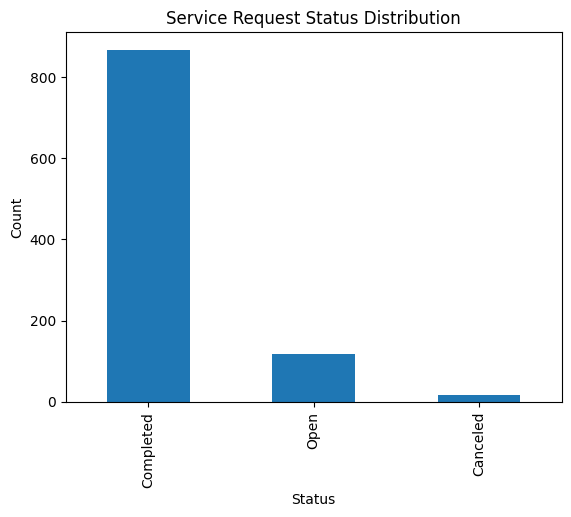

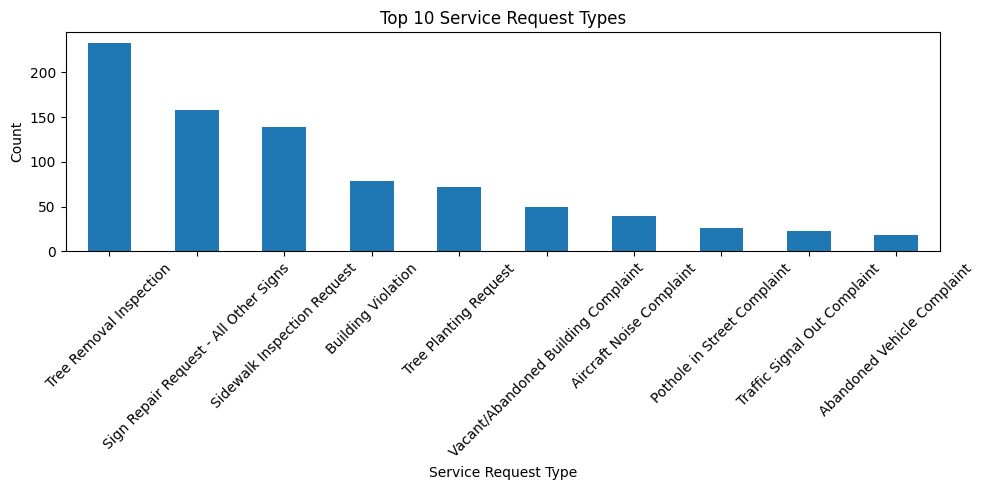

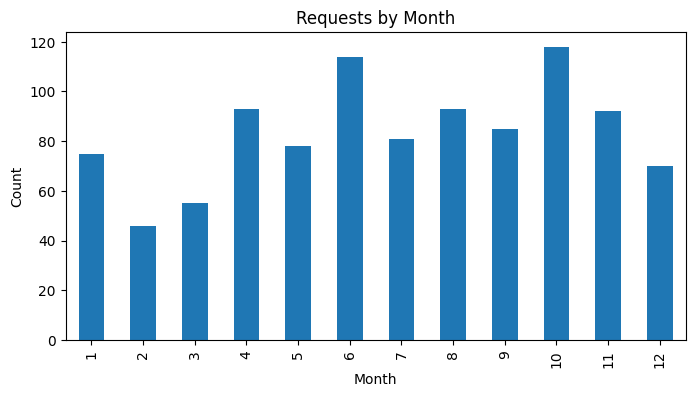

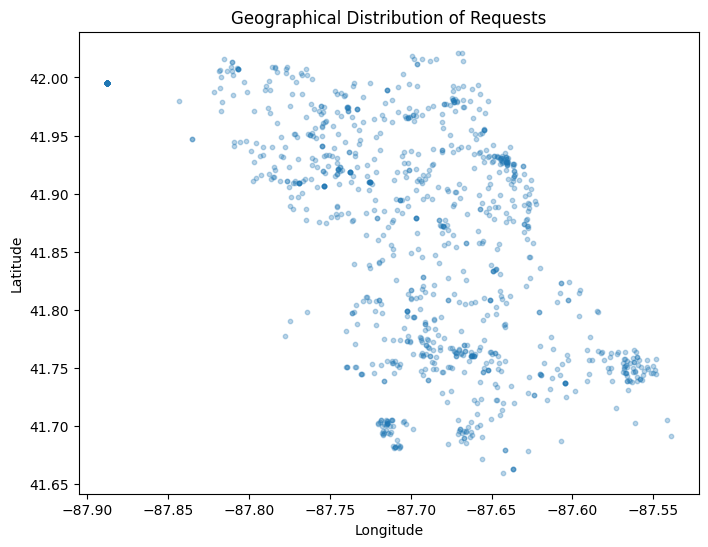

In [3]:
# Basic analysis of chicago_311_data
import matplotlib.pyplot as plt
import seaborn as sns

# Show basic info and summary statistics
df.info()
df.describe(include='all')

df['status'].value_counts().plot(kind='bar', title='Service Request Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Top 10 service request types
plt.figure(figsize=(10,5))
df['sr_type'].value_counts().head(10).plot(kind='bar', title='Top 10 Service Request Types')
plt.xlabel('Service Request Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Requests by month (if created_month exists)
if 'created_month' in df.columns:
    plt.figure(figsize=(8,4))
    df['created_month'].value_counts().sort_index().plot(kind='bar', title='Requests by Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.show()

# Geographical distribution (scatter plot)
if 'latitude' in df.columns and 'longitude' in df.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(df['longitude'], df['latitude'], alpha=0.3, s=10)
    plt.title('Geographical Distribution of Requests')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()